In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df_movies = pd.read_csv('/kaggle/input/popular-movies-datasets-58000-movies/movies.csv')
df_ratings = pd.read_csv('/kaggle/input/popular-movies-datasets-58000-movies/ratings.csv')

/kaggle/input/movies-and-ratings/movie_and_ratings.csv
/kaggle/input/popular-movies-datasets-58000-movies/movies.csv
/kaggle/input/popular-movies-datasets-58000-movies/ratings.csv
/kaggle/input/popular-movies-datasets-58000-movies/genome-tags.csv
/kaggle/input/popular-movies-datasets-58000-movies/genome-scores.csv
/kaggle/input/popular-movies-datasets-58000-movies/tags.csv
/kaggle/input/popular-movies-datasets-58000-movies/links.csv


In [40]:
# dropping duplcate movie entries
df_movies.drop_duplicates(subset=['title'], inplace=True)
df_movies.shape

(58020, 3)

There are 58098 movies in total

In [41]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
df_movies.tail()

,movieId,title,genres
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi
58097,193886,Leal (2018),Action|Crime|Drama


From above tail and head of the df_movies dataframe we can say that the data is arranged in ascending order of movieId.

In [43]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
8,1,2478,4.0,1256677239
9,1,2840,3.0,1256677500


In [44]:
df_ratings.tail()

,userId,movieId,rating,timestamp
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524
27753443,283228,54286,4.5,1354159718


In [45]:
#dropping duplicate values, to make sure that no data is repeated.
df_ratings.drop_duplicates(inplace=True)
df_ratings.shape

(27753444, 4)

From the above head and tail of the ratings data set we can say that the ratings data set is in ascending order by userId and each user may have watched more than one movie. The shape of the ratings data set is 27753444, 4 which means that there are 27753444 rows and 4 columns

In [46]:
df_ratings.movieId.value_counts()

318       97999
356       97040
296       92406
593       87899
2571      84545
          ...  
165077        1
172453        1
192975        1
167092        1
142855        1
Name: movieId, Length: 53889, dtype: int64

From the above result we can see that most watched movie is having movieId 318
Let's check if the above statement is true.

In [47]:
# to know the information about the variables we use .info() method
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [48]:
df_check = df_ratings[df_ratings.movieId==318]
print(f'The movie with movieId = 318 is seen by {df_check.shape[0]} users')

The movie with movieId = 318 is seen by 97999 users


Hence we can conclude that the movie with ID 318 is watched by 97999 users

In [49]:
# What movie is it?
max_watched_movie = df_movies[df_movies.movieId==318]
print(max_watched_movie.iloc[0].title)

Shawshank Redemption, The (1994)


In [50]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [51]:
# combined_df = pd.DataFrame(columns=['movie_id','movie_title', 'total_views', 'average_rating', 'genre'])
combined_df = pd.read_csv('/kaggle/input/movies-and-ratings/movie_and_ratings.csv')

In [52]:
'''This code was used to generate movies-and-ratings.csv file'''

# for j in df_ratings.movieId.unique():
#     try:
#         movie_name = df_movies[df_movies.movieId == j].iloc[0].title 
#     except:
#         movie_name = 'not_found'
#     temp_movie_ratings_df = df_ratings[df_ratings.movieId==j] 
#     try:
#         movie_genre = df_movies[df_movies.movieId == j].iloc[0].genres 
#     except:
#         movie_genre = 'movie_not_found'
#     movie_rating = 0
#     total_rating = 0
#     for i in temp_movie_ratings_df.rating:
#         movie_rating += i 
#         total_rating += 1
#     combined_df = combined_df.append({'movie_id':j, 'movie_title':movie_name, 'total_views':total_rating, 'average_rating':round(movie_rating/total_rating, 1), 'genre':movie_genre}, ignore_index = True)

'This code was used to generate movies-and-ratings.csv file'

In [53]:
combined_df.sort_values(by=['movie_id', 'average_rating'], inplace=True)
combined_df.head()

,Unnamed: 0,movie_id,movie_title,total_views,average_rating,genre
43,43,1,Toy Story (1995),68469,3.9,Adventure|Animation|Children|Comedy|Fantasy
44,44,2,Jumanji (1995),27143,3.2,Adventure|Children|Fantasy
830,830,3,Grumpier Old Men (1995),15585,3.2,Comedy|Romance
2972,2972,4,Waiting to Exhale (1995),2989,2.9,Comedy|Drama|Romance
45,45,5,Father of the Bride Part II (1995),15474,3.1,Comedy


In [54]:
'''Creating a column to make groups of films by rounding their ratings'''
combined_df['rating_segment'] = np.round_(combined_df['average_rating'].astype(float))

In [69]:
'''Top 10 movies by total_views'''
combined_df = combined_df.sort_values(by='total_views', ascending=False)
combined_df.reset_index()
combined_df.head(10)[['movie_id', 'movie_title', 'total_views']]

,movie_id,movie_title,total_views
111,318,"Shawshank Redemption, The (1994)",97999
122,356,Forrest Gump (1994),97040
107,296,Pulp Fiction (1994),92406
166,593,"Silence of the Lambs, The (1991)",87899
377,2571,"Matrix, The (1999)",84545
102,260,Star Wars: Episode IV - A New Hope (1977),81815
147,480,Jurassic Park (1993),76451
155,527,Schindler's List (1993),71516
74,110,Braveheart (1995),68803
43,1,Toy Story (1995),68469


In [77]:
# Top 10 movies by rating
temp_df = combined_df.sort_values(by=['average_rating', 'total_views'], ascending=False)[combined_df.total_views>1000]
temp_df.head(10)[['movie_id', 'movie_title', 'total_views', 'average_rating']]

,movie_id,movie_title,total_views,average_rating
2561,159817,Planet Earth (2006),1384,4.5
111,318,"Shawshank Redemption, The (1994)",97999,4.4
1785,174053,Black Mirror: White Christmas (2014),1074,4.4
155,527,Schindler's List (1993),71516,4.3
63,50,"Usual Suspects, The (1995)",62180,4.3
191,858,"Godfather, The (1972)",60904,4.3
35,1221,"Godfather: Part II, The (1974)",38875,4.3
1264,2019,Seven Samurai (Shichinin no samurai) (1954),14578,4.3
107,296,Pulp Fiction (1994),92406,4.2
166,593,"Silence of the Lambs, The (1991)",87899,4.2


In [56]:
# importing data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

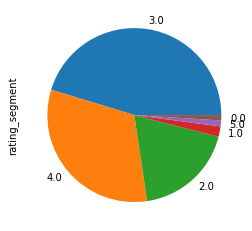

In [57]:
# Now let's see ratings by segment
combined_df.rating_segment.value_counts().plot(kind='pie');

From the above pie chart we can see that most of the films are rated around 3 followed by ratings 4 and 2.

Plot to see the rise in viewing

In [61]:
# now splitting genre to get individual genre, forming a new column and dropping the old genre and rating_segment column
genre_series = []
for i in combined_df.genre:
    genre_series.append(i.split('|'))
genre_series = pd.Series(genre_series)
combined_df['genre_list'] = genre_series
combined_df.drop(labels=['genre', 'rating_segment'], axis=1, inplace=True)
combined_df.head()

,Unnamed: 0,movie_id,movie_title,total_views,average_rating,genre_list
111,111,318,"Shawshank Redemption, The (1994)",97999,4.4,"[Adventure, Drama, Sci-Fi]"
122,122,356,Forrest Gump (1994),97040,4.1,"[Action, Adventure, Comedy]"
107,107,296,Pulp Fiction (1994),92406,4.2,"[Action, Drama, Romance]"
166,166,593,"Silence of the Lambs, The (1991)",87899,4.2,"[Adventure, Drama]"
377,377,2571,"Matrix, The (1999)",84545,4.1,"[Drama, Mystery, Thriller]"


### Tasks -
* Find how many distinct genres are there
* make a pie chart showing which genres are on top